In [68]:
# gradient will equal change per unit
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as sg
import os, sys

%matplotlib inline
matplotlib.rcParams.update({'text.color': 'white'})

In [99]:
def showMe(*plots):
    plt.figure(figsize=(20,10))
    for p in plots:
        plt.plot(p)

125


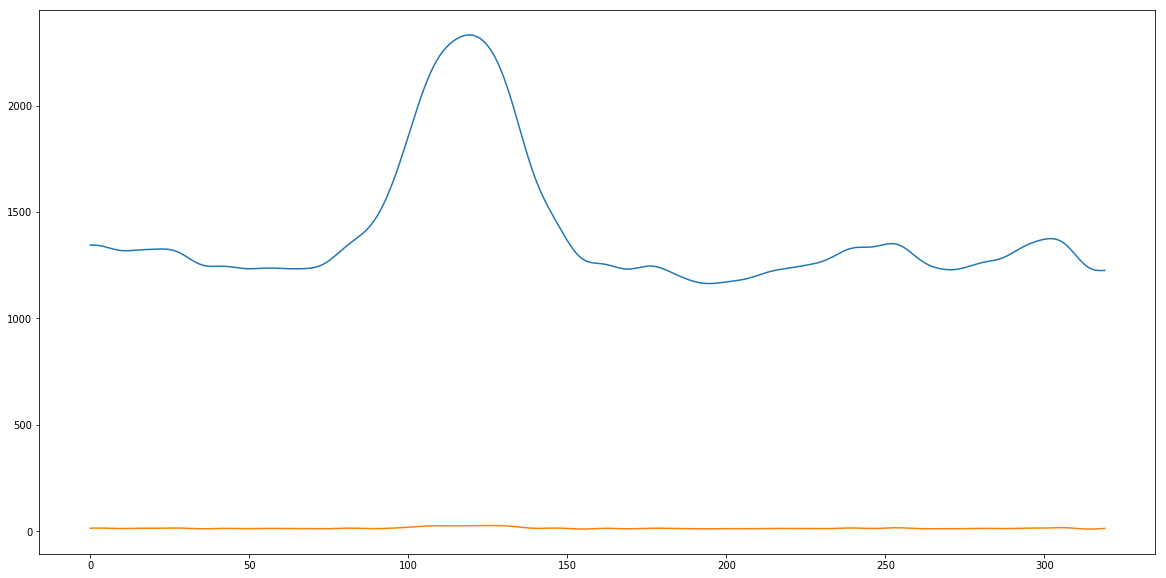

In [123]:
series = np.loadtxt("./contrasts/contrast_CO2.txt", delimiter='\n')
showMe(sg.symiirorder1(series, 1,.9), series)
print(np.argmax(series))

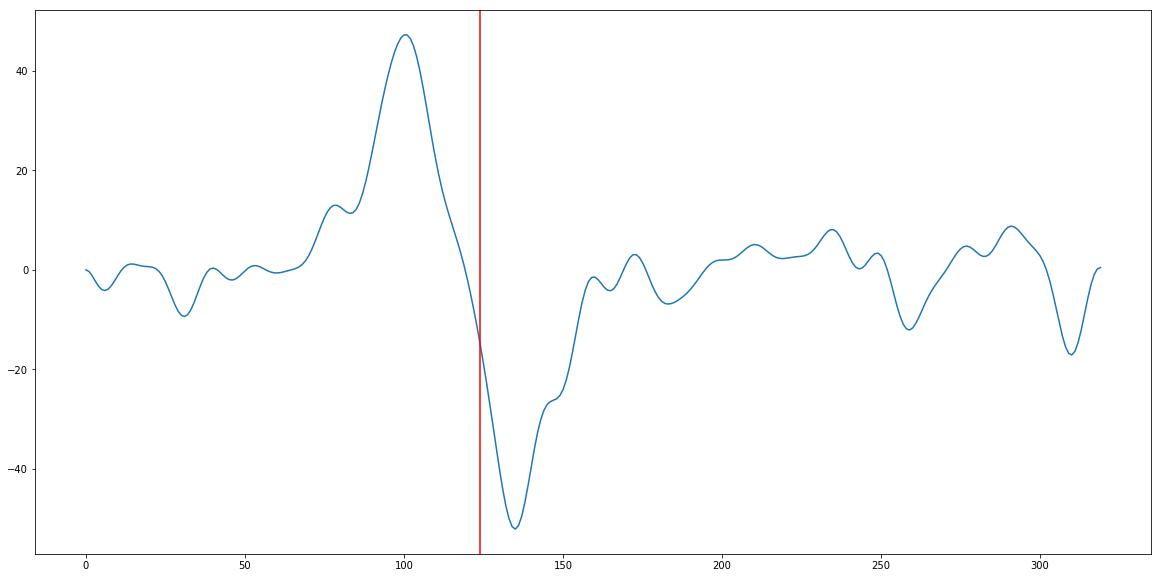

320 320


In [124]:
d_series = np.gradient(sg.symiirorder1(series,1,.9))
showMe(d_series)
plt.axvline(x=124, color = "red")
plt.show()
print(len(series), len(d_series))

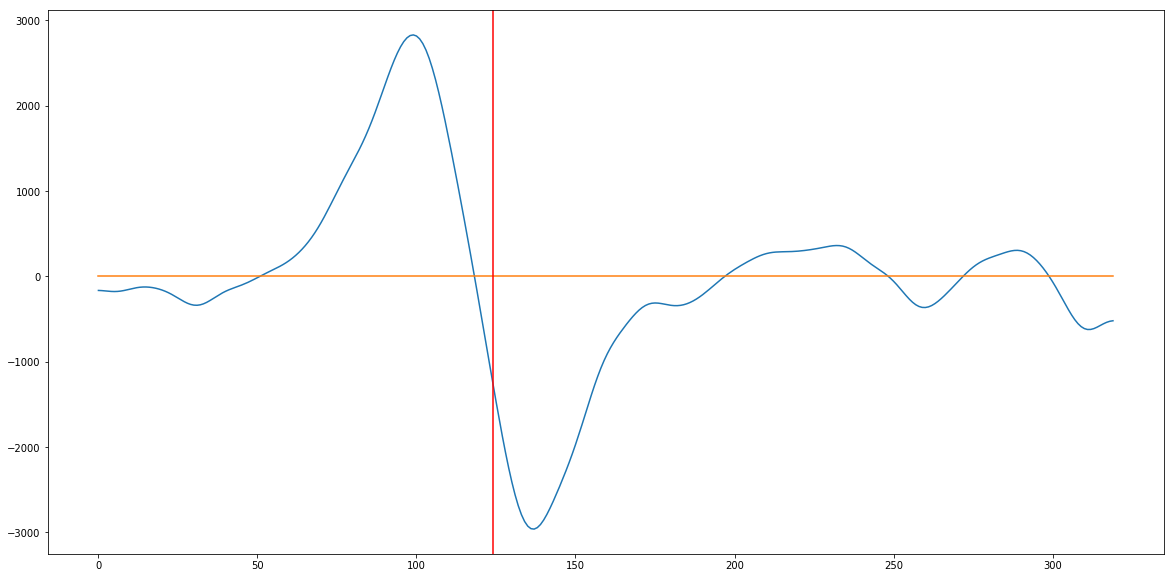

In [125]:
smooth_d_series = sg.symiirorder1(d_series, 1,.9)

showMe(smooth_d_series, np.linspace(0,0,num=320))
plt.axvline(x=124, color = "red")
plt.show()
#max is our guess at the exponent's power (the exponent being e)

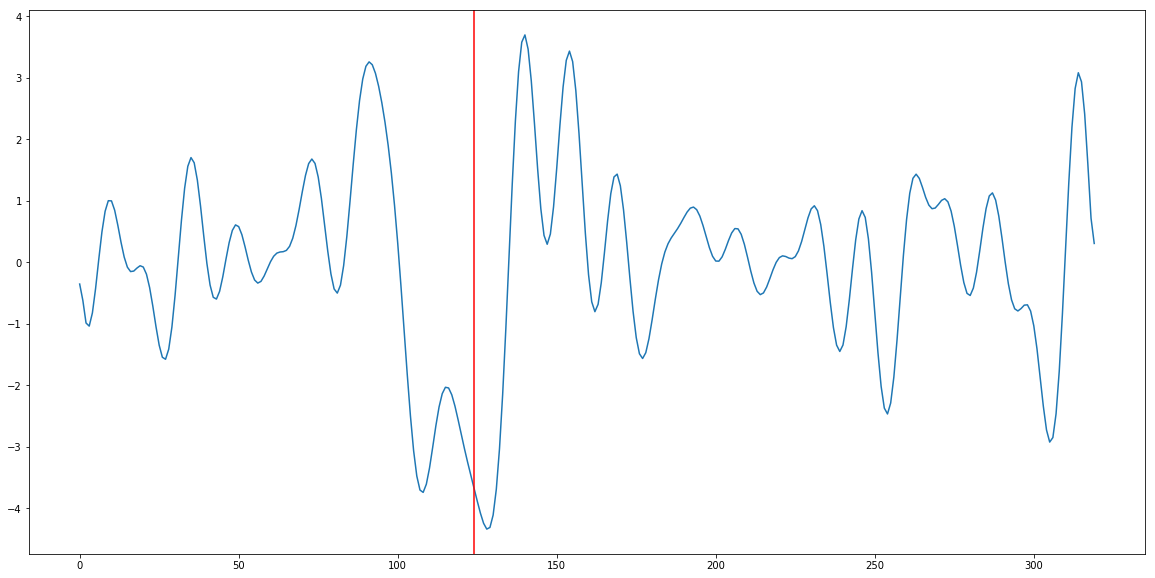

320


In [126]:
d2_series = np.gradient(d_series)
showMe(d2_series)
plt.axvline(x=124, color = "red")
plt.show()
print(len(d2_series))

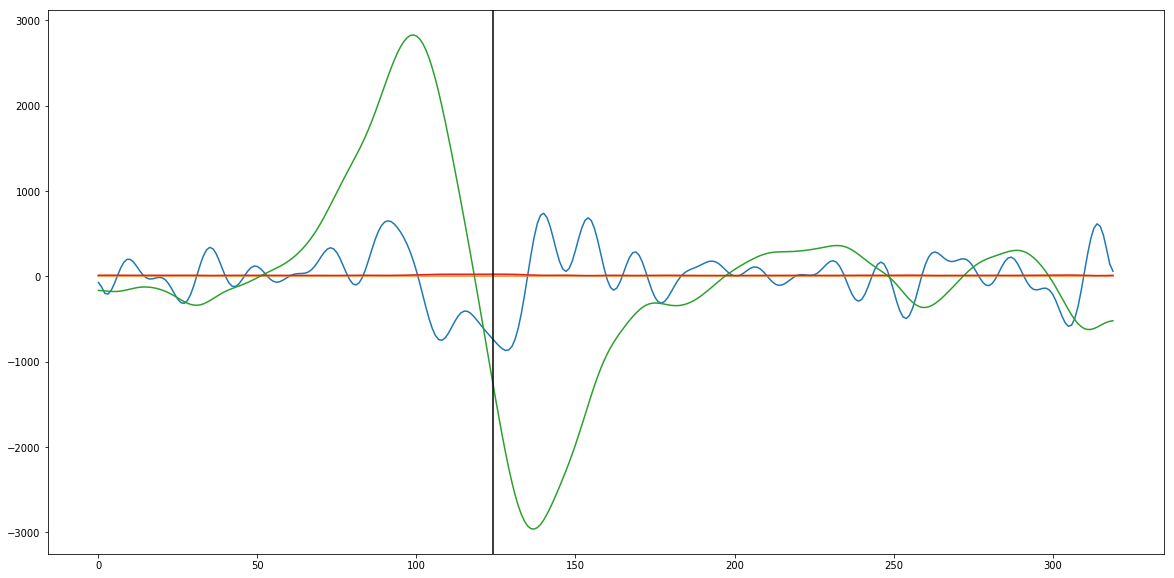

In [127]:
# smooth_d2_series = sg.symiirorder1(d2_series, 10,.99)
smooth_d2_series = sg.savgol_filter(d2_series, 3, 2)*200
showMe(smooth_d2_series,np.linspace(0,0,num=320), smooth_d_series, series)
plt.axvline(x=124, color = "black")
plt.show()

In [128]:
separator = np.argmin(smooth_d2_series)
print(separator)


128


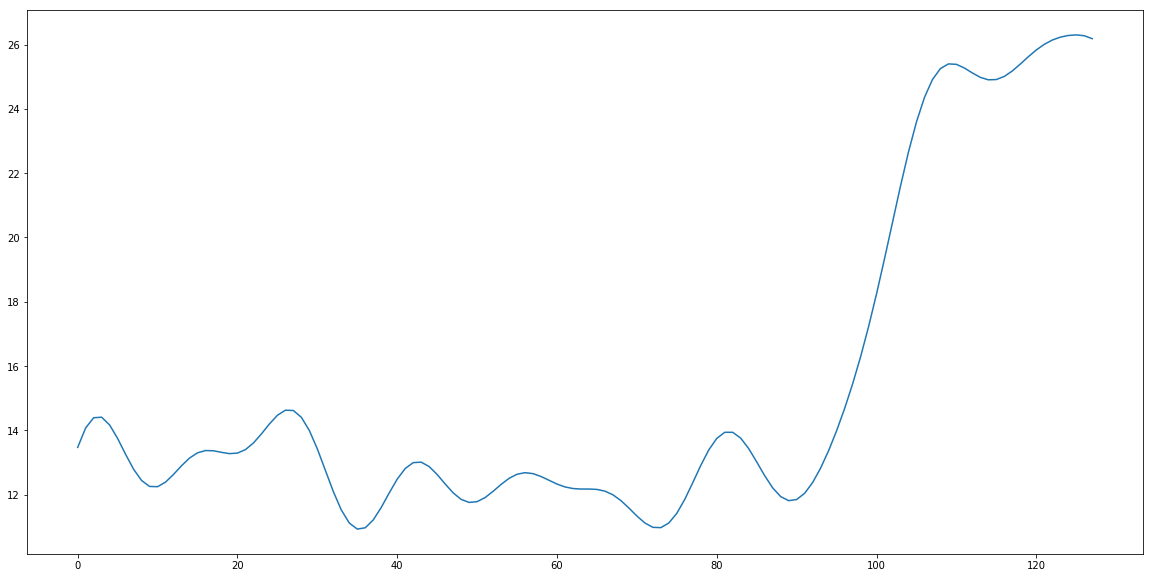

In [129]:
showMe(series[0:separator])

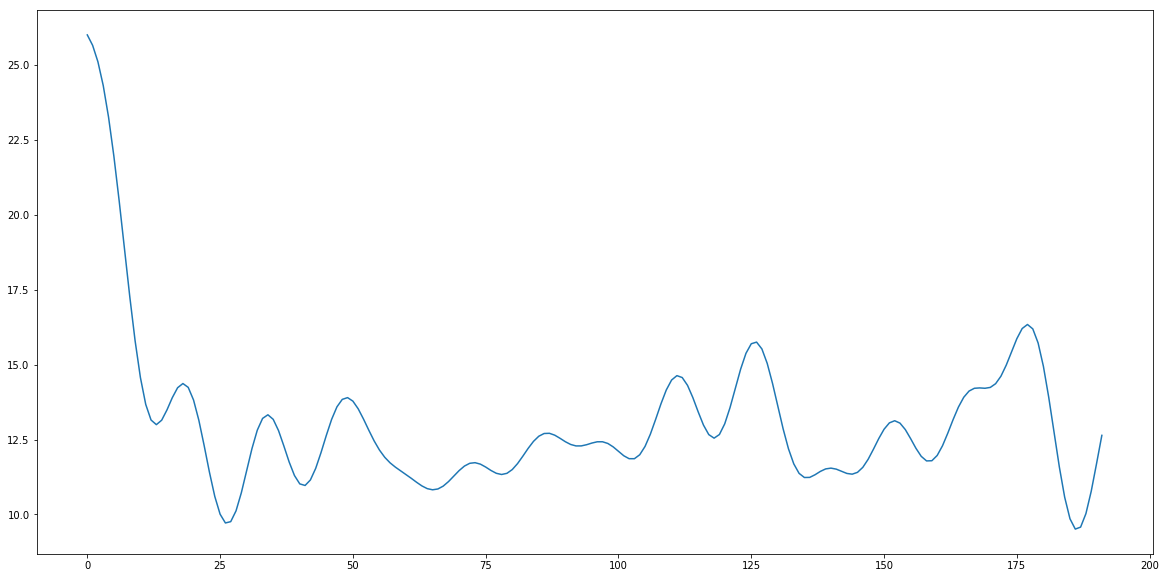

In [130]:
showMe(series[separator:])

In [115]:
def piece_splitter(sequence):
    return np.argmin(sg.symiirorder1(np.gradient(np.gradient(sequence)), 10,.9))    

In [116]:
split = piece_splitter(series)
print(split)

126
